<a href="https://colab.research.google.com/github/YaeshwanthUrumaiya/Article-Classification/blob/main/MediaPipeBasicProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is MediaPipe?

It's an open source framework for google which basically provides ML functionality with Google's predefined models doing all of the work so you don't have to train, test and validate any of your own model or build your custom version of a predefined model like ResNet.

There any many functionality that it provides, and the face/iris detection seems like the easier to pull off, so imma test that out and see how MediaPipe works.

Note: The ML functionality is in MediaPipe Solutions, which seems like a subset of the main framework and it is very early release at the moment as it is mentioned in the following LINK:https://developers.google.com/mediapipe/solutions

In [5]:
!pip install mediapipe

In [7]:
import mediapipe as mp
#Yup, that works

In [9]:
#now, lets import the other stuff
import cv2
from google.colab.patches import cv2_imshow #btw, imshow won't work on google colab, so need to import another function

In [10]:
#lets setup mp to work with our current task
mp_face_mesh = mp.solutions.face_mesh # to import our face mesh model and stuff
mp_drawing = mp.solutions.drawing_utils # to import all of the other functionality which is used to draw the output

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)
# you are now creating an instance of the face mesh model
# static_img_mode means it's an normal img and not video
# max_num_faces is just an value of how many faces there are in the media
# min_detection_confidence is just the value of the output neuron of which is greater than 0.5, it will be counted as a valid face

<IPython.core.display.Javascript object>

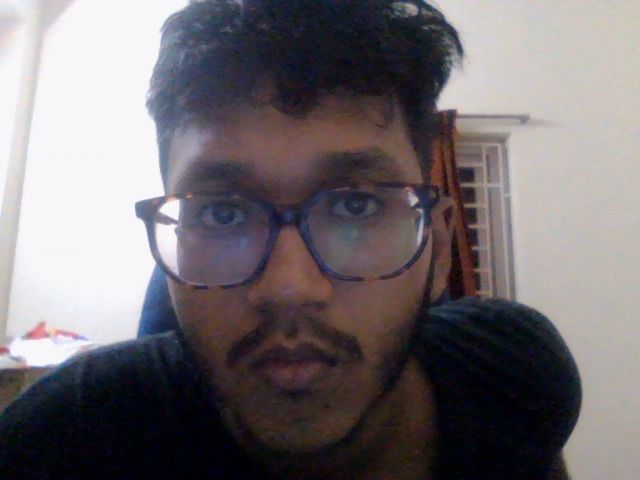

In [16]:
#it is annoying to import an img each time, to decided to take an img each time

from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

             // Resize the output to fit the video element.
             google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

             // Wait for Capture to be clicked.
             await new Promise((resolve) => capture.onclick = resolve);

             const canvas = document.createElement('canvas');
             canvas.width = video.videoWidth;
             canvas.height = video.videoHeight;
             canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

filename = take_photo()
img = cv2.imread(filename)
cv2_imshow(img)

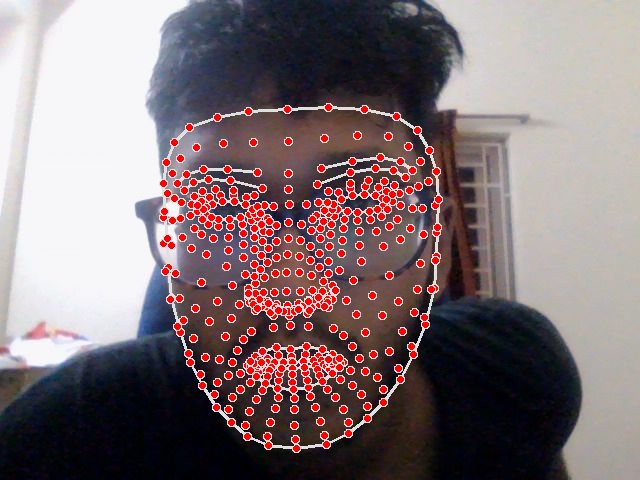

In [29]:
image = cv2.imread('/content/photo.jpg') #lets get the img

results = face_mesh.process(image) #and you just call the process function and you get the output

if results.multi_face_landmarks: #this checks if there any faces in the img
   for face_landmarks in results.multi_face_landmarks: # and if there is, it loops thru all of the faces
       mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS) # here, you are drawing ontop of the picture in the image variable
       #and you are drawing the face_landmarks and what you should draw from the face_landmark? facemesh_contours is the 3rd parameter.

cv2_imshow(image)

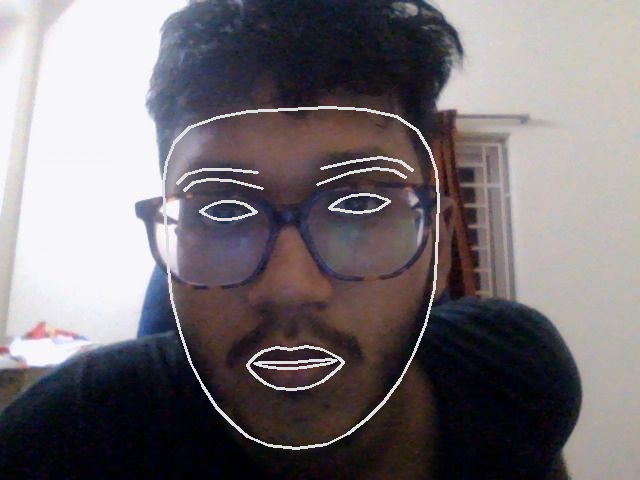

In [32]:
#what if you don't need all of that info? or a diff set of info?
#this is without all of those extra dots

image = cv2.imread('/content/photo.jpg')

results = face_mesh.process(image)

if results.multi_face_landmarks:
   for face_landmarks in results.multi_face_landmarks:
       mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_CONTOURS, landmark_drawing_spec=None)

cv2_imshow(image)

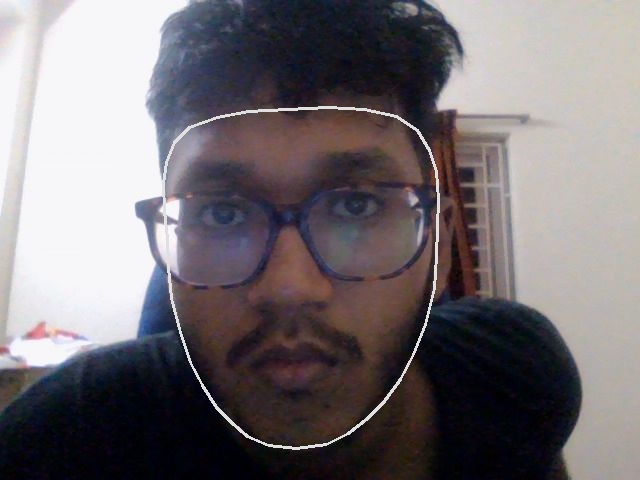

In [35]:
#Just the face Oval
image = cv2.imread('/content/photo.jpg')

result = face_mesh.process(image)

if result.multi_face_landmarks:
  for face in result.multi_face_landmarks:
    mp_drawing.draw_landmarks(image, face, mp_face_mesh.FACEMESH_FACE_OVAL,None)

cv2_imshow(image)

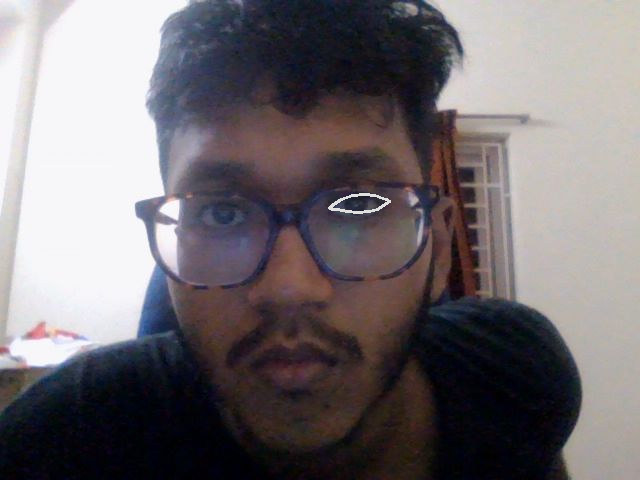

In [36]:
#Just the left eye
image = cv2.imread('/content/photo.jpg')

result = face_mesh.process(image)

if result.multi_face_landmarks:
  for face in result.multi_face_landmarks:
    mp_drawing.draw_landmarks(image, face, mp_face_mesh.FACEMESH_LEFT_EYE,None)

cv2_imshow(image)

Now, time for Hand landmark stuff

In [38]:
mp_hand = mp.solutions.hands
hand_mesh = mp_hand.Hands(static_image_mode = True)

<IPython.core.display.Javascript object>

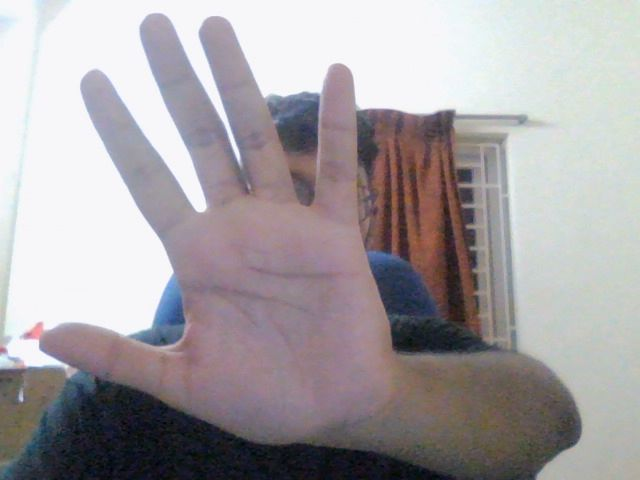

In [39]:
filename = take_photo()
img = cv2.imread(filename)
cv2_imshow(img)

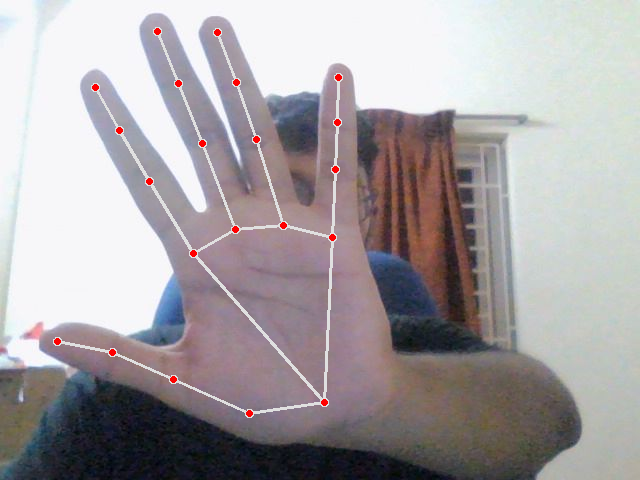

In [43]:
Imgg = cv2.imread('/content/photo.jpg')

result = hand_mesh.process(Imgg)

if result.multi_hand_landmarks:
  for hand in result.multi_hand_landmarks:
    mp_drawing.draw_landmarks(Imgg, hand, mp_hand.HAND_CONNECTIONS)

cv2_imshow(Imgg)

What if you want to do this over a Video Feed?

You can do that over a video using the static_image_mode parameter to False and it will set it to video and what it basically do is just go frame by frame in the video and run the functionality for each frame; so need good systems to support such an operation.